<a href="https://colab.research.google.com/github/Matt44320/ExerciciosSirius/blob/main/Correlacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercícios

Vamos trabalhar com dados proveniente de duas fontes diferentes. Considere os dados do Índice de Desenvolvimento da Educação Básica (Ideb) disponíveis em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio) e os dados sobre Produto Interno Bruto (PIB) disponíveis em [PIB](https://basedosdados.org/dataset/br-ibge-pib?bdm_table=municipio).

No conjunto de dados `ideb.csv` vamos selecionar as colunas `ano`, `id_municipio`, `media_saeb_mat`, `media_saeb_port` e `media_ideb` provenientes dos dados do Ideb, e as colunas `pib` e `impostos_liquidos` do `pib.csv`.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ideb = '/content/drive/MyDrive/Colab Notebooks/Sirius_DS/Sprint1/W1_correlacao/ideb.csv'
pib = '/content/drive/MyDrive/Colab Notebooks/Sirius_DS/Sprint1/W1_correlacao/pib.csv'

In [3]:
import pandas as pd

df_pib = pd.read_csv(pib)
df_pib.columns
df_pib1 = df_pib[['pib', 'impostos_liquidos']]
df_pib

,ano,id_municipio,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,1100015,111290995,7549266,103741729,27013223,9376871,24651113,42700523
1,2002,1100023,449592816,42665972,406926845,28590178,99922936,161851549,116562182
2,2002,1100031,31767520,1867935,29899585,10883801,1961907,5128876,11925001
3,2002,1100049,474443097,49622951,424820146,32810376,98292764,175748703,117968303
4,2002,1100056,79173614,8200971,70972643,11283793,6651475,25306009,27731366
...,...,...,...,...,...,...,...,...,...
100181,2019,5222005,483663323,37741787,445921536,174224615,26348404,175036109,70312408
100182,2019,5222054,342355634,33561723,308793911,100351513,47140720,117133534,44168144
100183,2019,5222203,113668466,8405675,105262791,24110657,16186594,33145548,31819993
100184,2019,5222302,206971225,7933047,199038178,104542025,29867460,35312525,29316168


### Atividade 1: Selecione apenas as colunas `ano`, `id_municipio`, `media_saeb_mat`, `media_saeb_port` e `media_ideb` provenientes dos dados do Ideb, apenas para o ano de 2019 e agrupado por município.

In [4]:
df_ideb = pd.read_csv(ideb)
df_ideb.columns
df_ideb = df_ideb[['ano','id_municipio','nota_saeb_matematica', 'nota_saeb_lingua_portuguesa','ideb']]
df_ideb


,ano,id_municipio,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,1200302,167.80,165.60,2.3
1,2005,1200328,151.80,149.60,1.8
2,2005,1200328,163.60,155.80,1.9
3,2005,1200328,159.00,153.39,1.9
4,2005,1200336,138.00,134.19,2.3
...,...,...,...,...,...
294421,2019,3551108,229.75,216.07,6.2
294422,2019,3551702,305.85,296.39,6.2
294423,2019,3555406,230.69,216.92,6.2
294424,2019,3555406,230.69,216.92,6.2


In [8]:
df_ideb_2019 = df_ideb[df_ideb['ano'] == 2019]
df_ideb_2019 = df_ideb_2019.loc[:,'id_municipio':]
df_ideb_2019.head()

,id_municipio,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
8947,1200104,288.92,263.10,8.1
8948,1200104,254.78,231.63,6.8
8949,1200401,246.47,228.63,6.7
8950,1200450,256.67,231.75,6.9
8951,2701407,261.32,223.47,7.0


In [9]:
df_ideb_2019_municipio = df_ideb_2019.groupby(by = 'id_municipio').agg({'nota_saeb_matematica':'mean', 'nota_saeb_lingua_portuguesa' : 'mean','ideb':'mean'})
df_ideb_2019_municipio.rename(
    columns = {'nota_saeb_matematica':'media_saeb_mat', 'nota_saeb_lingua_portuguesa' : 'media_saeb_lingua_port', 'ideb':'media_ideb'}, inplace =True)
df_ideb_2019_municipio

,media_saeb_mat,media_saeb_lingua_port,media_ideb
id_municipio,,,
1100015,253.283750,242.246250,5.050000
1100023,248.223750,243.618750,4.762500
1100031,229.495000,221.500000,4.850000
1100049,259.150000,249.888889,5.200000
1100056,266.288571,254.334286,5.642857
...,...,...,...
5222005,272.708571,262.805714,6.000000
5222054,271.685714,264.780000,5.828571
5222203,241.580000,231.394286,4.657143


### Atividade 2: Selecione as colunas `ano`, `id_municipio`, `pib` e `impostos_liquidos` dos dados do PIB, para o ano de 2019 e agrupado por município.

In [10]:
df_pib2 = df_pib[['ano','id_municipio','pib', 'impostos_liquidos']]
df_pib2_2019 = df_pib2[df_pib2['ano'] == 2019]
df_pib2_2019

,ano,id_municipio,pib,impostos_liquidos
94616,2019,1100015,495628767,29350985
94617,2019,1100023,2578829725,284397627
94618,2019,1100031,139959390,5997974
94619,2019,1100049,2260643565,253988284
94620,2019,1100056,506854457,76671376
...,...,...,...,...
100181,2019,5222005,483663323,37741787
100182,2019,5222054,342355634,33561723
100183,2019,5222203,113668466,8405675
100184,2019,5222302,206971225,7933047


In [12]:
df_pib_2019_municipio = df_pib2_2019.groupby(by = 'id_municipio').agg({'pib':'mean', 'impostos_liquidos':'mean'})
df_pib_2019_municipio

,pib,impostos_liquidos
id_municipio,,
1100015,4.956288e+08,2.935098e+07
1100023,2.578830e+09,2.843976e+08
1100031,1.399594e+08,5.997974e+06
1100049,2.260644e+09,2.539883e+08
1100056,5.068545e+08,7.667138e+07
...,...,...
5222005,4.836633e+08,3.774179e+07
5222054,3.423556e+08,3.356172e+07
5222203,1.136685e+08,8.405675e+06


### Atividade 3: Vamos juntar os dois DataFrames em um único. Para isso, vamos "unir" os dois dataframes pela variável `id_municipio`.

In [28]:
df = df_ideb_2019_municipio.merge(df_pib_2019_municipio, on = 'id_municipio', how = 'outer')
df.reset_index(level=0, inplace=True)
df.head()


,id_municipio,media_saeb_mat,media_saeb_lingua_port,media_ideb,pib,impostos_liquidos
0,1100015,253.283750,242.246250,5.050000,4.956288e+08,29350985.0
1,1100023,248.223750,243.618750,4.762500,2.578830e+09,284397627.0
2,1100031,229.495000,221.500000,4.850000,1.399594e+08,5997974.0
3,1100049,259.150000,249.888889,5.200000,2.260644e+09,253988284.0
4,1100056,266.288571,254.334286,5.642857,5.068545e+08,76671376.0


In [29]:
df.dtypes

id_municipio                int64
media_saeb_mat            float64
media_saeb_lingua_port    float64
media_ideb                float64
pib                       float64
impostos_liquidos         float64
dtype: object

### Atividade 4:  Verifique se há dados faltantes, além disso verifique se há alguma coluna irrelevante. Se houver, descarte-a.

In [30]:
df.isna().sum()

id_municipio               0
media_saeb_mat            21
media_saeb_lingua_port    21
media_ideb                21
pib                        0
impostos_liquidos          0
dtype: int64

In [31]:
df_semna = df.dropna()

df_semna.shape

(5549, 6)

### Atividade 5: Quais são os tipos das variáveis do DataFrame?

As variáveis média saeb matemática, lingua portuguesa e média ideb apresentam dados continuos enquanto as variáveis pib e impostos liquidos mostram dados de tipo discreto.

### Atividade 6: Observando as variáveis envolvidas, você acha que deve existir alguma correlação entre quais delas?

Será que municípios com alta nota no Ideb possuem um PIB alto?

In [32]:
df_semna.corr(method = 'spearman')

,id_municipio,media_saeb_mat,media_saeb_lingua_port,media_ideb,pib,impostos_liquidos
id_municipio,1.000000,0.477500,0.467497,0.535183,0.187526,0.246786
media_saeb_mat,0.477500,1.000000,0.960929,0.811259,0.175707,0.233401
media_saeb_lingua_port,0.467497,0.960929,1.000000,0.762744,0.224943,0.279383
media_ideb,0.535183,0.811259,0.762744,1.000000,0.151978,0.210089
pib,0.187526,0.175707,0.224943,0.151978,1.000000,0.960425
impostos_liquidos,0.246786,0.233401,0.279383,0.210089,0.960425,1.000000


### O que significa a correlação das variáveis `id_municipio` e `ideb`?

Significa que ha correlação fraca entre id do município e PIB o que não é relevante pois o id_municipio é um indice.

### Atividade 7: Vamos importar os dados de [Estatística de Segurança Pública do Rio de Janeiro](https://basedosdados.org/dataset/br-isp-estatisticas-seguranca?bdm_table=taxa_evolucao_mensal_uf) e procurar por correlações entre algumas das colunas.

In [33]:
seg = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sirius_DS/Sprint1/W1_correlacao/seg_rj.csv')
seg.corr(method= 'spearman')

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
ano,1.000000,-0.039640,-0.794997,-0.182688,-0.433580,-0.792489,-0.008083,-0.683444,0.419777,-0.605552,...,0.365211,0.451421,-0.436808,-0.190954,-0.848485,-0.224156,0.024228,0.163659,0.439859,-0.197525
mes,-0.039640,1.000000,-0.127381,-0.029673,-0.042646,-0.122955,-0.131089,-0.157678,-0.111790,-0.020612,...,0.121727,-0.004108,-0.051777,-0.009800,-0.144176,0.041454,-0.057891,0.080015,-0.020097,0.046734
hom_doloso,-0.794997,-0.127381,1.000000,0.278659,0.602589,0.998617,0.227061,0.938888,-0.074373,0.439327,...,-0.429450,-0.129023,0.199766,0.075089,0.771263,0.109701,0.202137,-0.101718,-0.283577,0.191467
lesao_corp_morte,-0.182688,-0.029673,0.278659,1.000000,0.187286,0.294053,0.254990,0.340909,-0.018490,0.029415,...,-0.194238,-0.001662,-0.092447,-0.064317,0.193709,-0.042204,0.117483,-0.218406,-0.105568,-0.004715
latrocinio,-0.433580,-0.042646,0.602589,0.187286,1.000000,0.633127,0.126139,0.587096,0.044404,0.172995,...,-0.172835,0.013662,0.020468,0.081481,0.408382,0.021470,0.038552,-0.087784,-0.024232,0.188828
cvli,-0.792489,-0.122955,0.998617,0.294053,0.633127,1.000000,0.229438,0.940526,-0.074098,0.430536,...,-0.427027,-0.124805,0.188524,0.071023,0.767163,0.103854,0.200591,-0.109337,-0.281478,0.192077
hom_por_interv_policial,-0.008083,-0.131089,0.227061,0.254990,0.126139,0.229438,1.000000,0.529131,-0.060869,-0.438805,...,-0.368168,0.181322,-0.584047,-0.567050,0.021605,0.002970,0.141050,0.023824,-0.331946,-0.083722
letalidade_violenta,-0.683444,-0.157678,0.938888,0.340909,0.587096,0.940526,0.529131,1.000000,-0.070437,0.225388,...,-0.490651,0.003789,-0.034444,-0.127541,0.668729,0.086651,0.235289,-0.104029,-0.342171,0.165897
tentat_hom,0.419777,-0.111790,-0.074373,-0.018490,0.044404,-0.074098,-0.060869,-0.070437,1.000000,-0.027126,...,0.442030,0.575950,0.051438,0.291901,-0.207211,-0.117285,0.194882,-0.084723,0.702333,0.168033
lesao_corp_dolosa,-0.605552,-0.020612,0.439327,0.029415,0.172995,0.430536,-0.438805,0.225388,-0.027126,1.000000,...,0.000117,-0.291923,0.890175,0.651756,0.595812,0.104105,-0.006000,-0.232360,0.090855,0.191462


### Atividade 8: Selecione os dados apenas para o ano de 2020 e apenas as colunas `mês`, `hom_doloso, lesao_corp_morte, latrocinio, cvli, hom_por_interv_policial`, e `trafico_drogas`

In [34]:
seg_2020 = seg.loc[seg['ano'] == 2020, ['mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli', 'hom_por_interv_policial', 'trafico_drogas']]
seg_2020

,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,trafico_drogas
204,1,2.07,0.02,0.05,2.14,0.90,5.06
205,2,1.88,0.01,0.06,1.95,0.95,5.06
206,3,2.16,0.01,0.05,2.22,0.66,4.70
207,4,1.80,0.03,0.03,1.86,1.03,5.29
208,5,1.57,0.00,0.03,1.61,0.75,5.39
209,6,1.49,0.01,0.01,1.52,0.20,4.71
210,7,1.48,0.02,0.04,1.54,0.30,5.15
211,8,1.50,0.01,0.07,1.58,0.29,5.28
212,9,1.37,0.02,0.04,1.43,0.31,5.12
213,10,1.59,0.01,0.03,1.63,0.83,5.23


In [35]:
seg_2020.corr(method = 'spearman')

,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,trafico_drogas
mes,1.000000,-0.468531,0.011427,-0.061063,-0.461538,-0.489510,-0.028070
hom_doloso,-0.468531,1.000000,-0.064753,0.423852,0.993007,0.664336,-0.396494
lesao_corp_morte,0.011427,-0.064753,1.000000,-0.031304,-0.026663,0.159977,0.053513
latrocinio,-0.061063,0.423852,-0.031304,1.000000,0.456180,0.017960,-0.252321
cvli,-0.461538,0.993007,-0.026663,0.456180,1.000000,0.678322,-0.357897
hom_por_interv_policial,-0.489510,0.664336,0.159977,0.017960,0.678322,1.000000,0.249124
trafico_drogas,-0.028070,-0.396494,0.053513,-0.252321,-0.357897,0.249124,1.000000


**Correlações fortes :** 

A Taxa de Morte por intervenção de agente do Estado por 100 mil habitantes e Taxa de Homicídio doloso por 100 mil habitantes têm uma correlação forte positiva de aproximadamente 0.66. 

Taxa de Latrocínio (roubo seguido de morte) por 100 mil habitantes e a Taxa de Crimes Violentos Letais Intencionais por 100 mil habitantes também demonstram uma correlação positiva forte de 0.46.

**Correlações muito fortes :**

A correlação mais forte do dataset está entre a Taxa de Homicídio doloso por 100 mil habitantes e a Taxa de Crimes Violentos Letais Intencionais por 100 mil habitantes com um coeficiente de 0.99. Isso significa que quando aumenta a taxa de homicidio doloso, a tendência é que a taxa de crimes violentos letais aumentem também.

### Verificando se a tendência de correlação em 2020 se confirma com todos os anos :

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

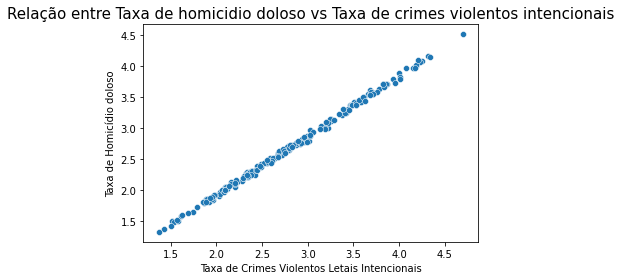

In [37]:
ax = sns.scatterplot(data = seg,x = 'cvli', y = 'hom_doloso').set_title(
    'Relação entre Taxa de homicidio doloso vs Taxa de crimes violentos intencionais',fontdict = { 'fontsize': 15})
sns.set( style = "white") 
plt.xlabel('Taxa de Crimes Violentos Letais Intencionais')
plt.ylabel('Taxa de Homicídio doloso')

ax;